<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/pca_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture Notes: Principal Component Analysis (PCA) for Biologists


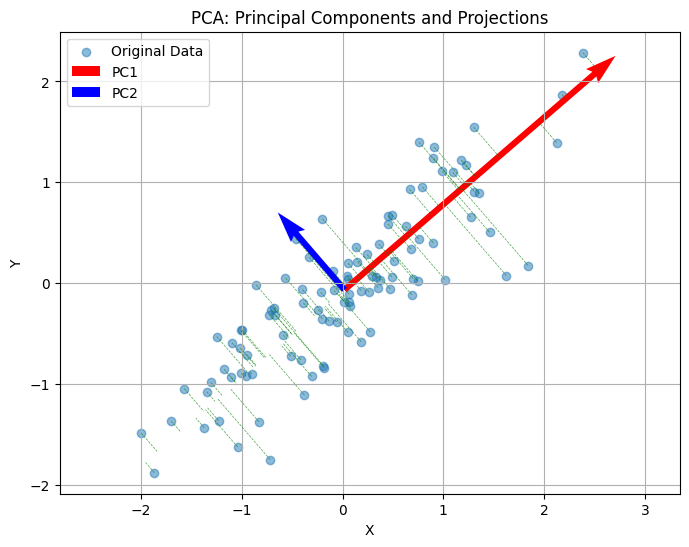

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate synthetic 2D data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

# Fit PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Get principal component vectors
origin = np.mean(X, axis=0)
pc1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
pc2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 3

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.quiver(*origin, *pc1, color='r', scale=1, scale_units='xy', angles='xy', width=0.01, label='PC1')
plt.quiver(*origin, *pc2, color='b', scale=1, scale_units='xy', angles='xy', width=0.01, label='PC2')

# Project points onto PC1
for point in X:
    proj = origin + np.dot((point - origin), pca.components_[0]) * pca.components_[0]
    plt.plot([point[0], proj[0]], [point[1], proj[1]], 'g--', linewidth=0.5, alpha=0.7)
plt.title('PCA: Principal Components and Projections')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

# Lecture Notes: Principal Component Analysis (PCA) for Biologists

## 🧬 Overview

Principal Component Analysis (PCA) is a **dimensionality reduction technique**. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.

It is widely used in biology for:

* Gene expression analysis
* Population genetics
* Imaging data
* Single-cell RNA-seq

---

## 🧠 Intuition

Imagine you have a dataset with many variables (e.g. expression levels of 10,000 genes). PCA helps us:

* Reduce the number of variables
* Identify patterns
* Remove noise
* Visualize high-dimensional data

PCA finds **new axes** (called **principal components**) that capture the maximum variance in the data.

*Step 1*: Center the data
Subtract the mean so the data is centered at the origin.

*Step 2*: Find the direction of maximum variance
PCA finds a new axis (PC1) that goes through the direction where the data varies the most:



*Step 3*: Project the data onto the new axes
Each data point is now described by its position along PC1 and (optionally) PC2.


PC1 captures the most variance in the data.
PC2 (perpendicular to PC1) captures the next most variance.

*Summary*:

PCA rotates the axes of your data so the greatest variation comes along the first principal components, allowing you to reduce dimensionality while keeping the most important information.


---



## 🧬 Overview

Principal Component Analysis (PCA) is a **dimensionality reduction technique**. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.

It is widely used in biology for:

* Gene expression analysis
* Population genetics
* Imaging data
* Single-cell RNA-seq

---

## 🧠 Intuition

Imagine you have a dataset with many variables (e.g. expression levels of 10,000 genes). PCA helps us:

* Reduce the number of variables
* Identify patterns
* Remove noise
* Visualize high-dimensional data

PCA finds **new axes** (called **principal components**) that capture the maximum variance in the data.

---

## 📊 Key Concepts




### 1. **Variance**

* Variance = how spread out the data is.
* PCA finds directions (principal components) that maximize variance.

Formula for variance of variable $x$:

$$
\text{Var}(x) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

### 2. **Covariance Matrix**

* Tells us how variables vary together.
* PCA uses this to find directions where the data varies the most.

Covariance between variables $x$ and $y$:

$$
\text{Cov}(x, y) = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

### 3. **Eigenvectors and Eigenvalues**

* Eigenvectors = directions (principal components)
* Eigenvalues = amount of variance explained by each component

---

## 🧪 Step-by-Step PCA Procedure

Given a dataset with samples (rows) and features (columns):

1. **Standardize** the data (mean = 0, variance = 1)
2. **Compute the covariance matrix**
3. **Calculate eigenvectors and eigenvalues**
4. **Sort** eigenvectors by decreasing eigenvalues
5. **Choose top k** eigenvectors (components)
6. **Project data** onto these components

---

## 🔬 Example: Gene Expression Data

* Rows = samples (patients)
* Columns = gene expression levels

### Goal:

* Reduce dimensionality from 20,000 genes to 2-3 PCs
* Visualize patterns between patient groups (e.g., healthy vs. cancer)

```python
# Sample Python code (requires numpy, sklearn, matplotlib)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = ...  # gene expression matrix
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Gene Expression')
plt.show()
```

---

## 📈 Interpreting the Output

* **Scree plot**: plots variance explained by each PC
* **Loadings**: show how much each original variable contributes to each PC
* **Biplots**: show samples and variables in the same plot

---

## Practical

* https://projector.tensorflow.org/


## 🧠 PCA vs. Other Techniques

* PCA is **unsupervised** (no labels used)
* Works best for **linear** relationships
* Alternatives:

  * t-SNE / UMAP for nonlinear structures
  * LDA (Linear Discriminant Analysis) for classification tasks

---

## 🧬 In Practice: Tips for Biologists

* Always **standardize** data before PCA
* Use **log-transformation** for count data (e.g., RNA-seq)
* Be cautious interpreting PCs biologically—PCs are **mathematical constructs**

---

## 📚 Further Reading

* "Principal Component Analysis" by Jolliffe
* scikit-learn documentation: [https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
* Bioinformatics tutorials on PCA:

  * [https://bioconductor.org](https://bioconductor.org)
  * [https://towardsdatascience.com](https://towardsdatascience.com) (search "PCA biology")

---

## ❓ Q\&A

* Q: Can PCA tell me which genes are important?

  * A: It shows which genes contribute most to the components (loadings), but doesn't test statistical significance.

* Q: How many PCs should I keep?

  * A: Use the **elbow rule** on the scree plot or **choose enough PCs to explain \~90% variance**.

---

## ✅ Summary

* PCA = powerful tool for reducing and visualizing high-dimensional data
* Especially useful in biology for gene expression and population structure
* Remember: PCA simplifies data, but interpretation must remain biologically grounded


## References

[1] https://projector.tensorflow.org/

## Animation

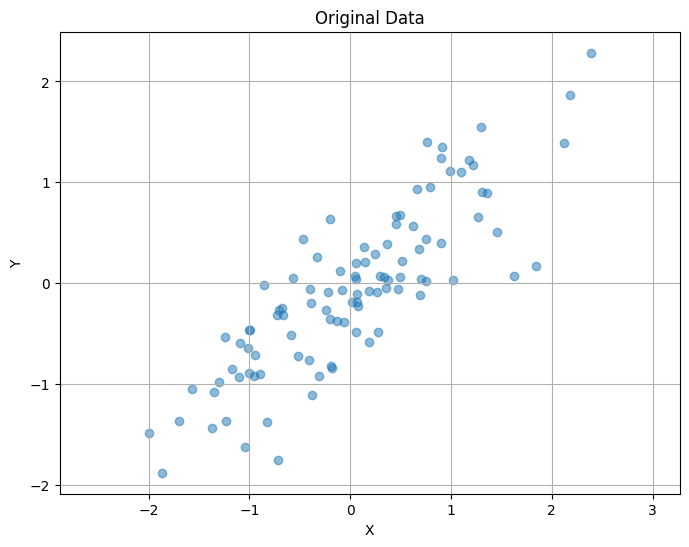

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.animation as animation
from IPython.display import HTML

# Generate synthetic 2D data
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.title('Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.grid(True)
plt.show()

In [67]:
def rotate_data(X, angle_deg):
    """Rotates the data by a given angle in degrees."""
    angle_rad = np.deg2rad(angle_deg)
    R = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                  [np.sin(angle_rad), np.cos(angle_rad)]])
    return X @ R

In [68]:
angles = np.arange(0, 360, 5)  # Angles for rotation
pca_results = []

for angle in angles:
    X_rotated = rotate_data(X, angle)
    pca = PCA(n_components=2)
    pca.fit(X_rotated)
    X_pca_rotated = pca.transform(X_rotated)

    # Get principal component vectors
    origin = np.mean(X_rotated, axis=0)
    pc1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0]) * 3
    pc2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1]) * 3

    # Project points onto PC1
    projections = np.array([origin + np.dot((point - origin), pca.components_[0]) * pca.components_[0] for point in X_rotated])

    pca_results.append({
        'angle': angle,
        'X_rotated': X_rotated,
        'origin': origin,
        'pc1': pc1,
        'pc2': pc2,
        'projections': projections
    })

print(f"Computed PCA for {len(pca_results)} angles.")

Computed PCA for 72 angles.


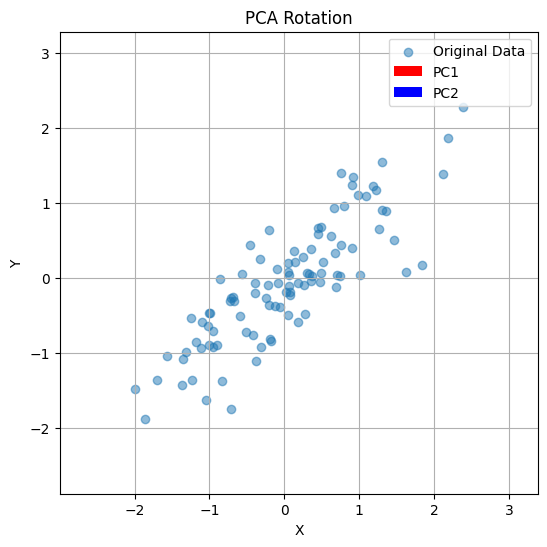

In [69]:
# Set up the figure and axes for the animation
fig, ax = plt.subplots(figsize=(8, 6))

# Set plot limits based on the original data to keep axes consistent
ax.set_xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('PCA Rotation')
ax.set_aspect('equal', adjustable='box')
ax.grid(True)

# Initialize plot elements that will be updated
scatter_plot = ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data') # Keep data static
pc1_quiver = ax.quiver([], [], [], [], color='r', scale=1, scale_units='xy', angles='xy', width=0.02, label='PC1') # Increased width
pc2_quiver = ax.quiver([], [], [], [], color='b', scale=1, scale_units='xy', angles='xy', width=0.02, label='PC2') # Increased width
projection_lines = [ax.plot([], [], 'g--', linewidth=0.5, alpha=0.7)[0] for _ in range(X.shape[0])]
legend = ax.legend()

# Function to initialize the animation
def init():
    # scatter_plot.set_offsets(np.empty((0, 2))) # Data is static, no need to update
    pc1_quiver.set_offsets(np.empty((0, 2)))
    pc1_quiver.set_UVC(np.empty((0)), np.empty((0)))
    pc2_quiver.set_offsets(np.empty((0, 2)))
    pc2_quiver.set_UVC(np.empty((0)), np.empty((0)))
    for line in projection_lines:
        line.set_data([], [])
    return [scatter_plot, pc1_quiver, pc2_quiver] + projection_lines + [legend]

# Function to update the animation frame
def update(frame_data):
    angle = frame_data['angle']
    X_rotated = frame_data['X_rotated'] # This is the original data now
    origin = np.mean(X_rotated, axis=0) # Recalculate origin based on original data
    pc1 = frame_data['pc1'] * 1.2 # Increased length
    pc2 = frame_data['pc2'] * 1.2 # Increased length
    projections = frame_data['projections']

    ax.set_title(f'PCA Rotation (Angle: {angle}°)')

    # Update scatter plot data - data is static, no need to update
    # scatter_plot.set_offsets(X_rotated)

    # Update quiver plots for PC vectors
    pc1_quiver.set_offsets([origin])
    pc1_quiver.set_UVC([pc1[0]], [pc1[1]])
    pc2_quiver.set_offsets([origin])
    pc2_quiver.set_UVC([pc2[0]], [pc2[1]])

    # Update projection lines
    for i in range(X_rotated.shape[0]):
        projection_lines[i].set_data([X_rotated[i, 0], projections[i, 0]],
                                     [X_rotated[i, 1], projections[i, 1]])

    return [scatter_plot, pc1_quiver, pc2_quiver] + projection_lines + [legend]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=pca_results, init_func=init, blit=True)

# To display the animation in the notebook, uncomment the following line
# plt.close(fig) # Prevent the static plot from showing
# HTML(ani.to_jshtml())

In [70]:
# Save the animation as a GIF
# To save the GIF, you might need to install imagemagick:
# !apt-get install imagemagick

# ani.save('pca_rotation.gif', writer='imagemagick', fps=10)

# Display the animation in the notebook
plt.close(fig) # Close the static plot
HTML(ani.to_jshtml())

# Task
Generate Python code to perform PCA on synthetic data, display the biplot, and generate the elbow curve/scree plot.

## Generate synthetic data

Create a synthetic dataset suitable for PCA.


**Reasoning**:
The subtask requires generating synthetic data using `make_blobs` and printing its shape. These steps can be combined into a single code block.



In [71]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=100, n_features=5, centers=3, random_state=42)

# Print the shape of the generated data
print(X.shape)

(100, 5)


## Perform PCA

Apply PCA to the synthetic data.


**Reasoning**:
Apply PCA to the standardized synthetic data.



In [72]:
from sklearn.preprocessing import StandardScaler

# Standardize the data X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with all components
pca = PCA(n_components=X_scaled.shape[1])

# Fit PCA to the standardized data
pca.fit(X_scaled)

# Transform the standardized data
X_pca = pca.transform(X_scaled)

print("Shape of standardized data:", X_scaled.shape)
print("Shape of PCA-transformed data:", X_pca.shape)
print("Explained variance ratio by component:", pca.explained_variance_ratio_)

Shape of standardized data: (100, 5)
Shape of PCA-transformed data: (100, 5)
Explained variance ratio by component: [0.5211985  0.40135775 0.05826032 0.01474168 0.00444175]


## Generate scree plot

Create and display a scree plot to show the explained variance ratio by each principal component.


**Reasoning**:
Generate and display the scree plot based on the PCA results.



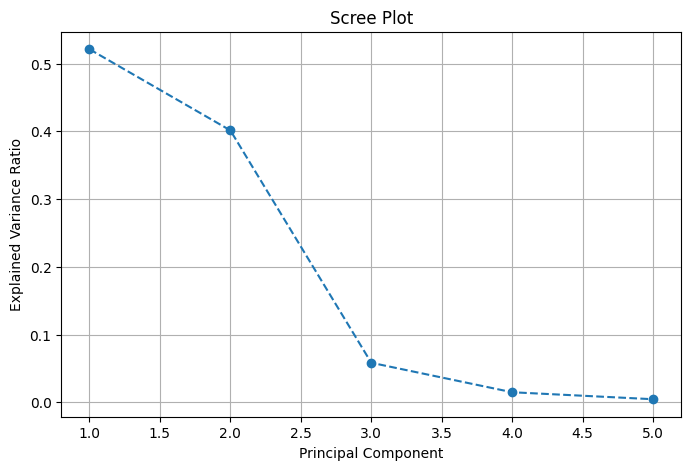

In [73]:
# Create a figure and axes for the plot
plt.figure(figsize=(8, 5))

# Plot the explained variance ratio
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')

# Add title and labels
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

# Add grid
plt.grid(True)

# Display the plot
plt.show()

## Generate biplot

Create and display a biplot to visualize the relationship between the principal components, the data points, and the original features.


**Reasoning**:
Generate the Python code to create and display the biplot as per the instructions.



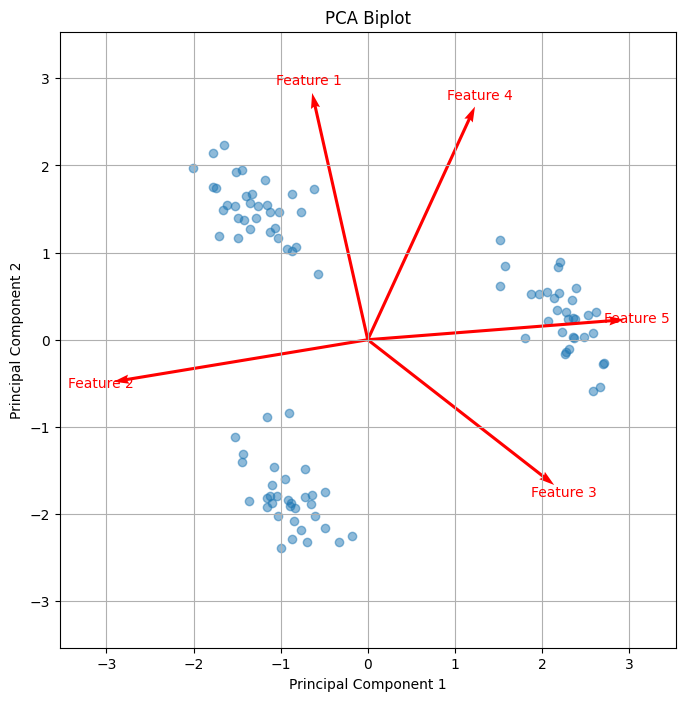

In [74]:
# Calculate scaled eigenvectors for plotting
# The eigenvectors pca.components_ are already scaled by singular values in the fit method,
# but multiplying by sqrt(explained_variance_) scales them to represent the variance
# captured by each component, which is useful for the biplot.
# However, for visualizing the direction and relative importance, scaling by a constant factor
# is often done for better visibility on the same plot as the data points.
# Let's use a scaling factor that makes the vectors visible relative to the data spread.
# A common approach is to scale them by the square root of the eigenvalues (explained_variance_)
# which represents the standard deviation captured by each component.
# Then, scale by an additional factor for visibility.
eigenvectors = pca.components_.T # Transpose to get components as columns
explained_variance = pca.explained_variance_

# Scale eigenvectors for plotting
# Scale by sqrt(explained_variance) and then by an arbitrary factor for visualization
scaling_factor = 3 # Adjust this factor as needed for better visualization
scaled_eigenvectors = eigenvectors * np.sqrt(explained_variance) * scaling_factor

# Set up the figure and axes for the biplot
plt.figure(figsize=(10, 8))

# 1. Create a scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)

# 2. Set the limits of the x and y axes
# Determine the range of the data and the scaled eigenvectors
max_data_abs = np.max(np.abs(X_pca[:, :2]))
max_vector_abs = np.max(np.abs(scaled_eigenvectors[:, :2]))
plot_limit = max(max_data_abs, max_vector_abs) * 1.2 # Add some padding

plt.xlim(-plot_limit, plot_limit)
plt.ylim(-plot_limit, plot_limit)

# 3. Add arrows representing the original features
origin = [0, 0]
for i in range(scaled_eigenvectors.shape[0]):
    plt.quiver(*origin, scaled_eigenvectors[i, 0], scaled_eigenvectors[i, 1],
               color='r', scale=1, scale_units='xy', angles='xy', width=0.005)

    # 4. Add labels to the arrows
    # For synthetic data with 5 features, label them 'Feature 1' to 'Feature 5'
    plt.text(scaled_eigenvectors[i, 0] * 1.05, scaled_eigenvectors[i, 1] * 1.05,
             f'Feature {i+1}', color='r', ha='center', va='center')


# 5. Add labels to the x and y axes
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# 6. Add a title to the plot
plt.title('PCA Biplot')

# 7. Include a grid
plt.grid(True)

# Set aspect ratio to equal to avoid distortion
plt.gca().set_aspect('equal', adjustable='box')

# 8. Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

*   The synthetic dataset consists of 100 samples and 5 features.
*   PCA was performed retaining all 5 principal components.
*   The scree plot visualizes the explained variance ratio for each principal component, showing how much variance each component captures.
*   The biplot shows the data points projected onto the first two principal components, along with arrows representing the original features and their contribution to these components.

### Insights or Next Steps

*   Analyze the scree plot to determine the "elbow point" and select the optimal number of principal components to retain for dimensionality reduction.
*   Interpret the biplot to understand which original features contribute most to the first two principal components and how data points cluster in the reduced-dimensional space.
